## Association Analysis on Online Retail Data processed data

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Path to filtered data - online retail (filtered_data.csv)
DATA_PATH = "/content/filtered_data.csv"
data = pd.read_csv(DATA_PATH)
data

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
400911,525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
400912,525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400913,525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400914,525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
print(data['Country'].unique())
# Stripping extra spaces in the description
data['Description']= data['Description'].str.strip();

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Denmark' 'Netherlands' 'Poland' 'Channel Islands' 'Spain'
 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden' 'United Arab Emirates'
 'Finland' 'Italy' 'Switzerland' 'Japan' 'Unspecified' 'Nigeria' 'Malta'
 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania' 'West Indies'
 'Korea' 'Brazil' 'Canada' 'Iceland']


In [4]:
#Transactions for each Country
d = data.groupby('Country')
d.describe()

Unnamed: 0                 ... Customer ID         
                          count           mean  ...         75%      max
Country                                         ...                     
Australia                 630.0  335104.006349  ...     12424.0  16321.0
Austria                   524.0  282050.549618  ...     12440.0  12865.0
Bahrain                    42.0  306703.595238  ...     12355.0  12355.0
Belgium                  1036.0  276392.104247  ...     12431.0  13022.0
Brazil                     62.0  348273.500000  ...     12751.0  12751.0
Canada                     77.0  425612.961039  ...     15390.0  15390.0
Channel Islands           821.0  289550.762485  ...     14936.0  14938.0
Cyprus                    533.0  155755.722326  ...     12455.0  13809.0
Denmark                   418.0  271033.933014  ...     13902.0  13919.0
EIRE                     8503.0  259494.404563  ...     14911.0  16047.0
Finland                   347.0  250332.198847  ...     12631.0  12696.0
France                   5452.0  277456.502568  ...     12682.0  14277.0
Germany                  7645.0  257922.963375  ...     12668.0  13815.0
Greece                    512.0  250751.167969  ...     17508.0  17508.0
Iceland                    71.0  464944.802817  ...     12347.0  12347.0
Israel                     74.0  337682.445946  ...     12666.0  12666.0
Italy                     708.0  314774.480226  ...     12675.0  14912.0
Japan                     164.0  283166.993902  ...     12799.0  12810.0
Korea                      53.0  467058.754717  ...     12767.0  12768.0
Lithuania                 154.0  368830.688312  ...     15332.0  15332.0
Malta                     170.0  255035.547059  ...     15480.0  15480.0
Netherlands              2728.0  267211.373534  ...     14646.0  14646.0
Nigeria                    30.0  304597.500000  ...     15702.0  15702.0
Norway                    365.0  426531.545205  ...     12433.0  15760.0
Poland                    182.0  295273.939560  ...     12779.0  12779.0
Portugal                  983.0  299280.267548  ...     12785.0  16291.0
RSA                        65.0   80090.000000  ...     12396.0  12396.0
Singapore                 117.0  281575.384615  ...     12744.0  12744.0
Spain                    1228.0  236606.645765  ...     12540.0  17097.0
Sweden                    867.0  268242.235294  ...     12687.0  17404.0
Switzerland              1170.0  307066.989744  ...     12451.0  13520.0
Thailand                   76.0  259294.000000  ...     12469.0  12469.0
USA                       230.0  202954.408696  ...     12733.0  12741.0
United Arab Emirates      315.0  211802.069841  ...     17829.0  17829.0
United Kingdom         364233.0  264832.565490  ...     16940.0  18287.0
Unspecified               277.0  259413.321300  ...     16320.0  16320.0
West Indies                54.0  314678.500000  ...     18140.0  18140.0

[37 rows x 40 columns]

In [5]:
# Top 5 countries by number of transactions
data.groupby('Country')['Country'].count().nlargest(5)

Country
United Kingdom    364233
EIRE                8503
Germany             7645
France              5452
Netherlands         2728
Name: Country, dtype: int64

In [6]:
data.Description.count()

400916

In [7]:
data.groupby(['Description'])['Description'].count().nlargest(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3107
REGENCY CAKESTAND 3 TIER              1695
STRAWBERRY CERAMIC TRINKET BOX        1372
ASSORTED COLOUR BIRD ORNAMENT         1355
HOME BUILDING BLOCK WORD              1192
PACK OF 72 RETRO SPOT CAKE CASES      1183
60 TEATIME FAIRY CAKE CASES           1169
REX CASH+CARRY JUMBO SHOPPER          1099
JUMBO BAG RED RETROSPOT               1075
LUNCH BAG RED SPOTTY                  1069
HEART OF WICKER LARGE                 1027
WOODEN FRAME ANTIQUE WHITE            1021
RED HANGING HEART T-LIGHT HOLDER      1013
LUNCH BAG  BLACK SKULL.                996
JUMBO STORAGE BAG SUKI                 974
LUNCH BAG SUKI  DESIGN                 970
LOVE BUILDING BLOCK WORD               965
PACK OF 60 PINK PAISLEY CAKE CASES     946
JUMBO SHOPPER VINTAGE RED PAISLEY      930
LUNCH BAG SPACEBOY DESIGN              920
Name: Description, dtype: int64

In [8]:
3107/400916

0.007749753065480051

In [0]:
# Transactions done in UK 
basket_UK =(data[data['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))

# Transactions done in EIRE (Ireland) 
basket_IRE =(data[data['Country'] =="EIRE"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))
  
# Transactions done in Germany     
basket_Germany =(data[data['Country'] =="Germany"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))

# Transactions done in France 
basket_France =(data[data['Country'] =="France"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))

# Transactions done in Netherlands     
basket_Netherlands =(data[data['Country'] =="Netherlands"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [10]:
basket_UK.isnull().count()

Description
10 COLOUR SPACEBOY PEN               17612
11 PC CERAMIC TEA SET POLKADOT       17612
12 ASS ZINC CHRISTMAS DECORATIONS    17612
12 COLOURED PARTY BALLOONS           17612
12 DAISY PEGS IN WOOD BOX            17612
                                     ...  
ZINC HEART LATTICE TRAY OVAL         17612
ZINC METAL HEART DECORATION          17612
ZINC POLICE BOX LANTERN              17612
ZINC TOP  2 DOOR WOODEN SHELF        17612
ZINC WILLIE WINKIE  CANDLE STICK     17612
Length: 4377, dtype: int64

In [0]:
#Helper Fuctions for generating the rules
def hot_encode(x): 
    if x <= 0:
        return 0
    if x >= 1:
        return 1
  
# Encoding the datasets 
basket_encoded_UK = basket_UK.applymap(hot_encode)

basket_encoded_IRE = basket_IRE.applymap(hot_encode)

basket_encoded_Germany = basket_Germany.applymap(hot_encode)

basket_encoded_France = basket_France.applymap(hot_encode)

basket_encoded_Netherlands =basket_Netherlands.applymap(hot_encode)

## UK

In [12]:
basket_encoded_UK

Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,24 HANGING EASTER EGGS FLORAL TUB,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE JIGSAW TOADSTOOLS,3 PIECE SPACEBOY COOKIE CUTTER SET,...,"WRAP,SUKI AND FRIENDS","WRAPPING PAPER, XMAS VILLAGE",YELLOW + BROWN BEAR FELT PURSE KIT,YELLOW BIRDS FELT DES FOODCOVER,YELLOW BREAKFAST CUP AND SAUCER,YELLOW BROWN BEAR FELT PURSE KIT,YELLOW COAT RACK PARIS FASHION,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW KNITTED KIDS RUCKSACK,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW RABBIT SAT EASTER,YELLOW RED FLOWER PIGGY BANK,YELLOW SHARK HELICOPTER,YELLOW VW BEETLE CERAMIC MONEY BOX,YELLOW/BLUE RETRO RADIO,YELLOW/PINK CERAMIC CANDLE HOLDER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [13]:
# Association rules for UK - Minimum support 0.04
frq_items_UK =apriori(basket_encoded_UK, min_support=0.04, use_colnames=True) 
rules_UK = association_rules(frq_items_UK, metric="lift", min_threshold=1)
rules_UK = rules_UK.sort_values(['confidence','lift'],ascending=[False,False])
rules_UK.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


No rules for minimum support 0.04. This suggests that there are no itemsets which match the minimum support threshold criteria.
However, we do find some rules if we drop below 0.04

In [14]:
# Association rules for UK - 0.03
frq_items_UK =apriori(basket_encoded_UK, min_support=0.03, use_colnames=True) 
rules_UK = association_rules(frq_items_UK, metric="lift", min_threshold=1)
rules_UK = rules_UK.sort_values(['confidence','lift'],ascending=[False,False])
rules_UK.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.043380,0.070293,0.033102,0.763089,10.855835,0.030053,3.924288
1,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.053713,0.165796,0.039178,0.729387,4.399302,0.030272,3.082644
5,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.045026,0.055644,0.030831,0.684741,12.305783,0.028326,2.995498
4,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.055644,0.045026,0.030831,0.554082,12.305783,0.028326,2.141589
3,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.070293,0.043380,0.033102,0.470921,10.855835,0.030053,1.808086


A high confidence percentage and strong lift factor suggests that the association is not just by accident.

In [15]:
# Generating rules at support 0.02
frq_items_UK =apriori(basket_encoded_UK, min_support=0.02, use_colnames=True) 
rules_UK = association_rules(frq_items_UK, metric="lift", min_threshold=1)
rules_UK = rules_UK.sort_values(['confidence','lift'],ascending=[False,False])
rules_UK.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.043380,0.070293,0.033102,0.763089,10.855835,0.030053,3.924288
31,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.053713,0.165796,0.039178,0.729387,4.399302,0.030272,3.082644
39,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.045026,0.055644,0.030831,0.684741,12.305783,0.028326,2.995498
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.048660,0.055928,0.027595,0.567095,10.139765,0.024873,2.180781
38,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.055644,0.045026,0.030831,0.554082,12.305783,0.028326,2.141589


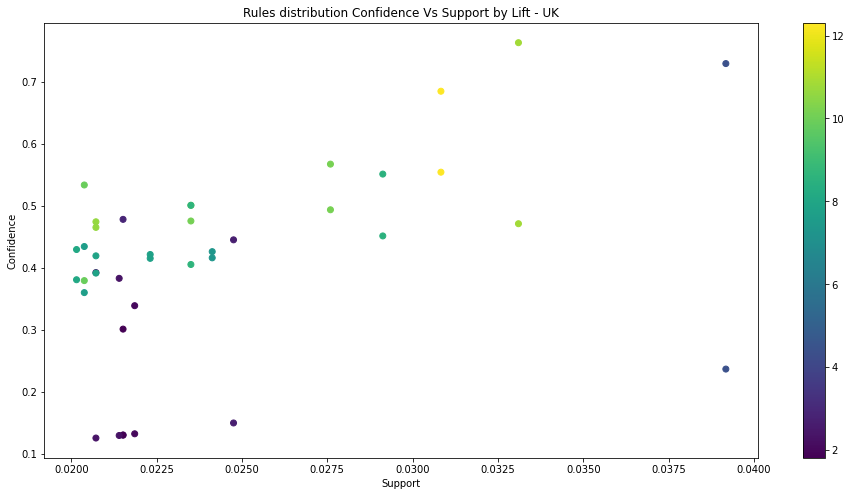

In [16]:
# Rules distribution

plt.figure(figsize=(16, 8))
plt.scatter(rules_UK['support'], rules_UK['confidence'], c=rules_UK['lift']);
plt.title('Rules distribution Confidence Vs Support by Lift - UK');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

## IRE

In [17]:
# Association Rules for IRE - Minimum support 0.08
frq_items_IRE = apriori(basket_encoded_IRE, min_support=0.08, use_colnames=True) 
rules_IRE = association_rules(frq_items_IRE, metric="lift", min_threshold=1)
rules_IRE = rules_IRE.sort_values(['confidence','lift'],ascending=[False,False])
rules_IRE.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 72 RETRO SPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.136076,0.167722,0.088608,0.651163,3.882405,0.065785,2.385865
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETRO SPOT CAKE CASES),0.167722,0.136076,0.088608,0.528302,3.882405,0.065785,1.831519


We found a strong relation between `(60 TEATIME FAIRY CAKE CASES)` and `(PACK OF 72 RETRO SPOT CAKE CASES)` suggesting that, if one item is bought, the other item will also most likely will be bought in IRE.

Also, unlike UK, we found association rules at minimum support threshold of 0.08 in IRE, suggesting that items sold for IRE are mostly related than the items sold in UK.

This makes sense, since the store is mostly catering to UK and offers a large variety of products for UK which might not be as popular in other countries. As a result, customers in IRE might only be interested in buying only a small category of products from a UK store, which increases the frequency of the items bought in IRE, since the variety is too small.

In [18]:
# Association Rules for IRE - Minimum support 0.07
frq_items_IRE = apriori(basket_encoded_IRE, min_support=0.07, use_colnames=True) 
rules_IRE = association_rules(frq_items_IRE, metric="lift", min_threshold=1)
rules_IRE = rules_IRE.sort_values(['confidence','lift'],ascending=[False,False])
rules_IRE.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.113924,0.167722,0.075949,0.666667,3.974843,0.056842,2.496835
2,(PACK OF 72 RETRO SPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.136076,0.167722,0.088608,0.651163,3.882405,0.065785,2.385865
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETRO SPOT CAKE CASES),0.167722,0.136076,0.088608,0.528302,3.882405,0.065785,1.831519
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.167722,0.113924,0.075949,0.452830,3.974843,0.056842,1.619380


In [19]:
# Association Rules for IRE - Minimum support 0.02
frq_items_IRE = apriori(basket_encoded_IRE, min_support=0.02, use_colnames=True) 
rules_IRE = association_rules(frq_items_IRE, metric="lift", min_threshold=1)
rules_IRE = rules_IRE.sort_values(['confidence','lift'],ascending=[False,False])
rules_IRE.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2278,"(SET/5 RED SPOTTY LID GLASS BOWLS, GIN AND TON...","(PACK OF 72 RETRO SPOT CAKE CASES, RAIN HAT WI...",0.022152,0.022152,0.022152,1.0,45.142857,0.021661,inf
2291,"(PACK OF 72 RETRO SPOT CAKE CASES, RAIN HAT WI...","(SET/5 RED SPOTTY LID GLASS BOWLS, GIN AND TON...",0.022152,0.022152,0.022152,1.0,45.142857,0.021661,inf
2400,"(HOME SWEET HOME MUG, PACK OF 72 RETRO SPOT CA...","(I CAN ONLY PLEASE ONE PERSON MUG, 72 SWEETHEA...",0.022152,0.022152,0.022152,1.0,45.142857,0.021661,inf
2403,"(HOME SWEET HOME MUG, 72 SWEETHEART FAIRY CAKE...","(I CAN ONLY PLEASE ONE PERSON MUG, PACK OF 72 ...",0.022152,0.022152,0.022152,1.0,45.142857,0.021661,inf
2406,"(I CAN ONLY PLEASE ONE PERSON MUG, PACK OF 72 ...","(HOME SWEET HOME MUG, 72 SWEETHEART FAIRY CAKE...",0.022152,0.022152,0.022152,1.0,45.142857,0.021661,inf


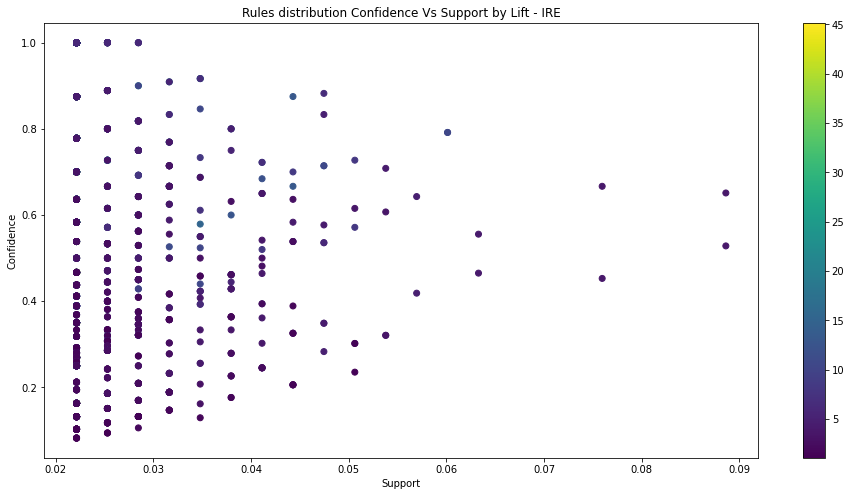

In [20]:
# Rules distribution

plt.figure(figsize=(16, 8))
plt.scatter(rules_IRE['support'], rules_IRE['confidence'], c=rules_IRE['lift']);
plt.title('Rules distribution Confidence Vs Support by Lift - IRE');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

## Germany

In [21]:
# Minimum threshold - 0.26
frq_items_Germany =apriori(basket_encoded_Germany, min_support=0.26, use_colnames=True) 
rules_Germany = association_rules(frq_items_Germany, metric="lift", min_threshold=1)
rules_Germany = rules_Germany.sort_values(['confidence','lift'],ascending=[False,False])

rules_Germany.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.285303,0.780980,0.262248,0.919192,1.176973,0.039432,2.710375
0,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.780980,0.285303,0.262248,0.335793,1.176973,0.039432,1.076017


Again, we find association rules at 0.26 minimum support threshold in case of Germany. Again, people from Germany might have a very limited selection of items from the UK based store which might lead to people purchasing a selected set of items.

In [22]:
# Minimum threshold - 0.15
frq_items_Germany =apriori(basket_encoded_Germany, min_support=0.15, use_colnames=True) 
rules_Germany = association_rules(frq_items_Germany, metric="lift", min_threshold=1)
rules_Germany = rules_Germany.sort_values(['confidence','lift'],ascending=[False,False])
rules_Germany.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(POSTAGE),0.187320,0.780980,0.175793,0.938462,1.201646,0.029499,3.559078
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.285303,0.780980,0.262248,0.919192,1.176973,0.039432,2.710375
7,(WOODLAND CHARLOTTE BAG),(POSTAGE),0.216138,0.780980,0.193084,0.893333,1.143862,0.024284,2.053314
1,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.178674,0.780980,0.155620,0.870968,1.115224,0.016079,1.697406
4,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.780980,0.285303,0.262248,0.335793,1.176973,0.039432,1.076017


In [23]:
# Minimum threshold - 0.05
frq_items_Germany =apriori(basket_encoded_Germany, min_support=0.05, use_colnames=True) 
rules_Germany = association_rules(frq_items_Germany, metric="lift", min_threshold=1)
rules_Germany = rules_Germany.sort_values(['confidence','lift'],ascending=[False,False])
rules_Germany.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
102,(WOODLAND WATER TRANSFER TATTOOS),(POSTAGE),0.060519,0.78098,0.057637,0.952381,1.219469,0.010373,4.599424
163,"(RED SPOTTY CHARLOTTE BAG, WOODLAND CHARLOTTE ...",(POSTAGE),0.054755,0.78098,0.051873,0.947368,1.213051,0.009111,4.161383
169,"(ROUND SNACK BOXES SET OF 4 FRUITS, RED TOADST...",(POSTAGE),0.054755,0.78098,0.051873,0.947368,1.213051,0.009111,4.161383
80,(ROUND SNACK BOXES SET OF 4 FRUITS),(POSTAGE),0.187320,0.78098,0.175793,0.938462,1.201646,0.029499,3.559078
32,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.086455,0.78098,0.080692,0.933333,1.195080,0.013172,3.285303


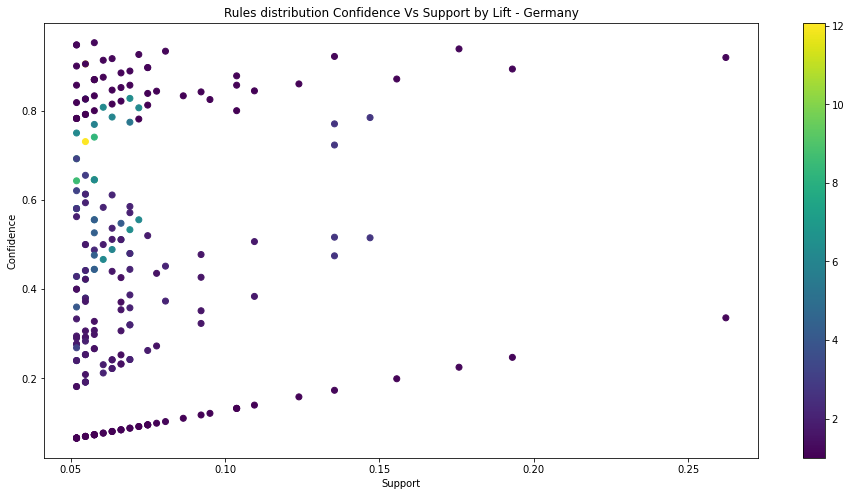

In [24]:
# Rules distribution

plt.figure(figsize=(16, 8))
plt.scatter(rules_Germany['support'], rules_Germany['confidence'], c=rules_Germany['lift']);
plt.title('Rules distribution Confidence Vs Support by Lift - Germany');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

## France

In [25]:
# Minimum threshold - 0.24
frq_items_France =apriori(basket_encoded_France, min_support=0.24, use_colnames=True) 
rules_France = association_rules(frq_items_France, metric="lift", min_threshold=1)
rules_France = rules_France.sort_values(['confidence','lift'],ascending=[False,False])

rules_France.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.266949,0.745763,0.241525,0.904762,1.213203,0.042445,2.669492
0,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.745763,0.266949,0.241525,0.323864,1.213203,0.042445,1.084176


Again for France, we find rules at minimum support threshold 0.24 which is similar to what we found for Germany.

In [26]:
# Minimum threshold - 0.15
frq_items_France =apriori(basket_encoded_France, min_support=0.15, use_colnames=True) 
rules_France = association_rules(frq_items_France, metric="lift", min_threshold=1)
rules_France = rules_France.sort_values(['confidence','lift'],ascending=[False,False])

rules_France.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(RED/WHITE DOT MINI CASES),(POSTAGE),0.190678,0.745763,0.173729,0.911111,1.221717,0.031528,2.860169
3,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.266949,0.745763,0.241525,0.904762,1.213203,0.042445,2.669492
7,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.207627,0.745763,0.182203,0.877551,1.176716,0.027363,2.076271
1,(LUNCH BOX WITH CUTLERY RETROSPOT),(POSTAGE),0.177966,0.745763,0.152542,0.857143,1.149351,0.019822,1.779661
2,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.745763,0.266949,0.241525,0.323864,1.213203,0.042445,1.084176


In [27]:
# Minimum threshold - 0.03
frq_items_France =apriori(basket_encoded_France, min_support=0.03, use_colnames=True) 
rules_France = association_rules(frq_items_France, metric="lift", min_threshold=1)
rules_France = rules_France.sort_values(['confidence','lift'],ascending=[False,False])

rules_France.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
731,(12 PENCILS TALL TUBE RED SPOTTY),"(POSTAGE, 12 PENCILS TALL TUBE WOODLAND)",0.033898,0.042373,0.033898,1.0,23.600000,0.032462,inf
4,(12 PENCILS TALL TUBE RED SPOTTY),(12 PENCILS TALL TUBE WOODLAND),0.033898,0.046610,0.033898,1.0,21.454545,0.032318,inf
728,"(12 PENCILS TALL TUBE RED SPOTTY, POSTAGE)",(12 PENCILS TALL TUBE WOODLAND),0.033898,0.046610,0.033898,1.0,21.454545,0.032318,inf
412,(PACK OF 60 DINOSAUR CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.033898,0.067797,0.033898,1.0,14.750000,0.031600,inf
842,"(RED SPOTTY CUP, BLUE SPOTTY CUP)",(PINK SPOTTY CUP),0.038136,0.067797,0.038136,1.0,14.750000,0.035550,inf


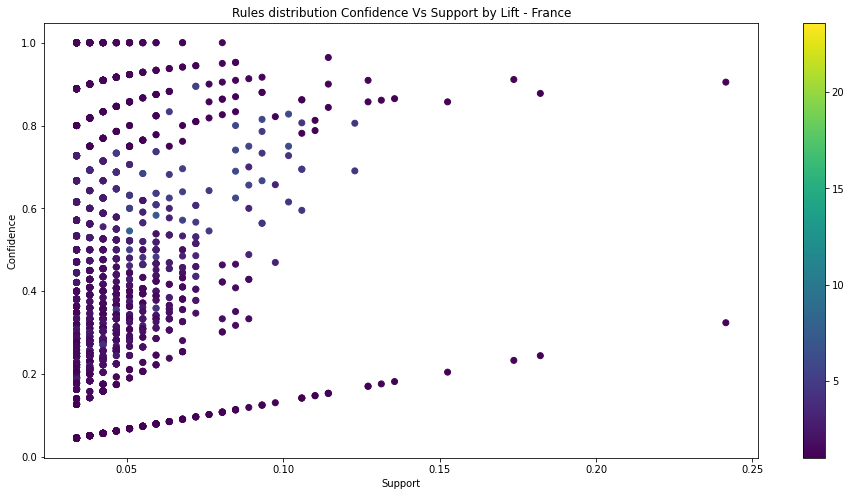

In [28]:
# Rules distribution

plt.figure(figsize=(16, 8))
plt.scatter(rules_France['support'], rules_France['confidence'], c=rules_France['lift']);
plt.title('Rules distribution Confidence Vs Support by Lift - France');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

# Netherlands

In [29]:
frq_items_Netherlands =apriori(basket_encoded_Netherlands, min_support=0.12, use_colnames=True) 
rules_Netherlands = association_rules(frq_items_Netherlands, metric="lift", min_threshold=1)
rules_Netherlands = rules_Netherlands.sort_values(['confidence','lift'],ascending=[False,False])

rules_Netherlands.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.140741,0.140741,0.125926,0.894737,6.357341,0.106118,8.162963
1,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.140741,0.140741,0.125926,0.894737,6.357341,0.106118,8.162963


In case of Netherlands, the actual number of transactions is 
far less as compared to other countries. Still, we see that the minimum support of 0.12 has association rules present.


In [30]:
frq_items_Netherlands =apriori(basket_encoded_Netherlands, min_support=0.05, use_colnames=True) 
rules_Netherlands = association_rules(frq_items_Netherlands, metric="lift", min_threshold=1)
rules_Netherlands = rules_Netherlands.sort_values(['confidence','lift'],ascending=[False,False])

rules_Netherlands.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(CHILDS BREAKFAST SET DOLLY GIRL),(CHILDS BREAKFAST SET SPACEBOY),0.051852,0.051852,0.051852,1.0,19.285714,0.049163,inf
7,(CHILDS BREAKFAST SET SPACEBOY),(CHILDS BREAKFAST SET DOLLY GIRL),0.051852,0.051852,0.051852,1.0,19.285714,0.049163,inf
170,(RED SPOTTY PLATE),(RED SPOTTY CUP),0.051852,0.059259,0.051852,1.0,16.875000,0.048779,inf
264,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...",(PACK OF 6 SKULL PAPER PLATES),0.051852,0.059259,0.051852,1.0,16.875000,0.048779,inf
265,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...",(PACK OF 6 SKULL PAPER CUPS),0.051852,0.059259,0.051852,1.0,16.875000,0.048779,inf


In [31]:
frq_items_Netherlands =apriori(basket_encoded_Netherlands, min_support=0.05, use_colnames=True) 
rules_Netherlands = association_rules(frq_items_Netherlands, metric="lift", min_threshold=1)
rules_Netherlands = rules_Netherlands.sort_values(['confidence','lift'],ascending=[False,False])

rules_Netherlands.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(CHILDS BREAKFAST SET DOLLY GIRL),(CHILDS BREAKFAST SET SPACEBOY),0.051852,0.051852,0.051852,1.0,19.285714,0.049163,inf
7,(CHILDS BREAKFAST SET SPACEBOY),(CHILDS BREAKFAST SET DOLLY GIRL),0.051852,0.051852,0.051852,1.0,19.285714,0.049163,inf
170,(RED SPOTTY PLATE),(RED SPOTTY CUP),0.051852,0.059259,0.051852,1.0,16.875000,0.048779,inf
264,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...",(PACK OF 6 SKULL PAPER PLATES),0.051852,0.059259,0.051852,1.0,16.875000,0.048779,inf
265,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...",(PACK OF 6 SKULL PAPER CUPS),0.051852,0.059259,0.051852,1.0,16.875000,0.048779,inf


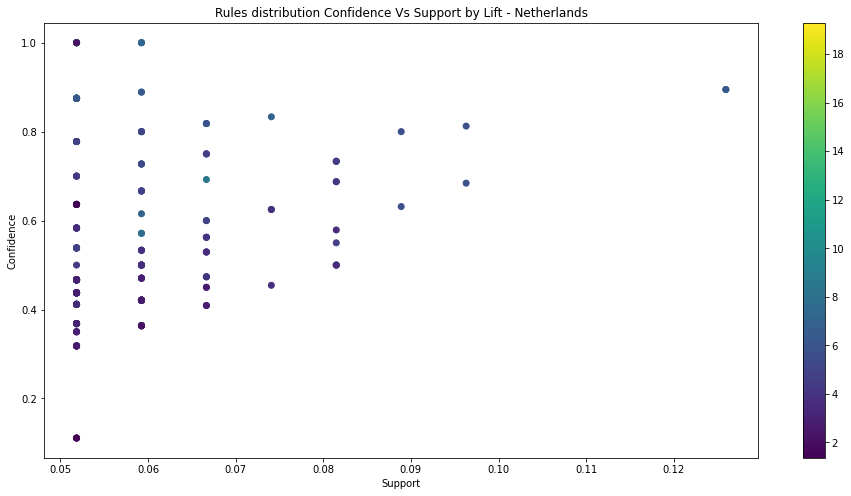

In [32]:
# Rules distribution

plt.figure(figsize=(16, 8))
plt.scatter(rules_Netherlands['support'], rules_Netherlands['confidence'], c=rules_Netherlands['lift']);
plt.title('Rules distribution Confidence Vs Support by Lift - Netherlands');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();